# EDA

### **Introduction to Data Exploration**

When analyzing a dataset, the first step is to explore and understand its structure, content, and potential patterns. This involves examining the features (columns), identifying the types of data they hold (categorical, numerical, or text), and looking for relationships between variables. For this dataset, which includes user demographics, app usage statistics, and preferences, the goal is to uncover **interesting trends and insights**.

The initial focus was on:
- **Understanding Demographics**: Analyzing user distribution by age, gender, and education level to identify the predominant groups using the app.
- **Behavioral Trends**: Exploring how traits like "Looking For" "Swiping History," and "Frequency of Usage" are connected, aiming to find patterns in user engagement.

I will try to ask and answer multiple creative questions to the dataset, to seek for any interesting correlations.

In [1]:
import pandas as pd
df = pd.read_csv('Dating App Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Height              500 non-null    float64
 4   Interests           500 non-null    object 
 5   Looking For         500 non-null    object 
 6   Children            500 non-null    object 
 7   Education Level     500 non-null    object 
 8   Occupation          500 non-null    object 
 9   Swiping History     500 non-null    int64  
 10  Frequency of Usage  500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [2]:
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


## Inspect and Cleaning data

- Typos and spelling mistakes
- Irregularities, e.g., abnormal data values and data formats
- Violations of the Integrity constraint.
- Outliers
- Duplications
- Missing values
- Inconsistency, e.g., inhomogeneity in values and types in representing the same data

Let's check for typos or irregularities

In [3]:
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} distinct values")

Column 'User ID': 500 distinct values
Column 'Age': 18 distinct values
Column 'Gender': 2 distinct values
Column 'Height': 500 distinct values
Column 'Interests': 387 distinct values
Column 'Looking For': 4 distinct values
Column 'Children': 3 distinct values
Column 'Education Level': 4 distinct values
Column 'Occupation': 8 distinct values
Column 'Swiping History': 101 distinct values
Column 'Frequency of Usage': 3 distinct values


In [4]:
for col in ['Gender', 'Looking For', 'Children', 'Education Level', 'Occupation', 'Frequency of Usage']:
  print(f"Column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Column 'Gender':
['Male' 'Female']
--------------------
Column 'Looking For':
['Casual Dating' 'Friendship' 'Marriage' 'Long-term Relationship']
--------------------
Column 'Children':
['No' 'Yes' 'Maybe']
--------------------
Column 'Education Level':
['High School' "Master's Degree" "Bachelor's Degree" 'Ph.D.']
--------------------
Column 'Occupation':
['Student' 'Artist' 'Social Media Influencer' 'Doctor' 'Engineer'
 'Teacher' 'Business Owner' 'Entrepreneur']
--------------------
Column 'Frequency of Usage':
['Weekly' 'Monthly' 'Daily']
--------------------


Let's see if there are any outliers

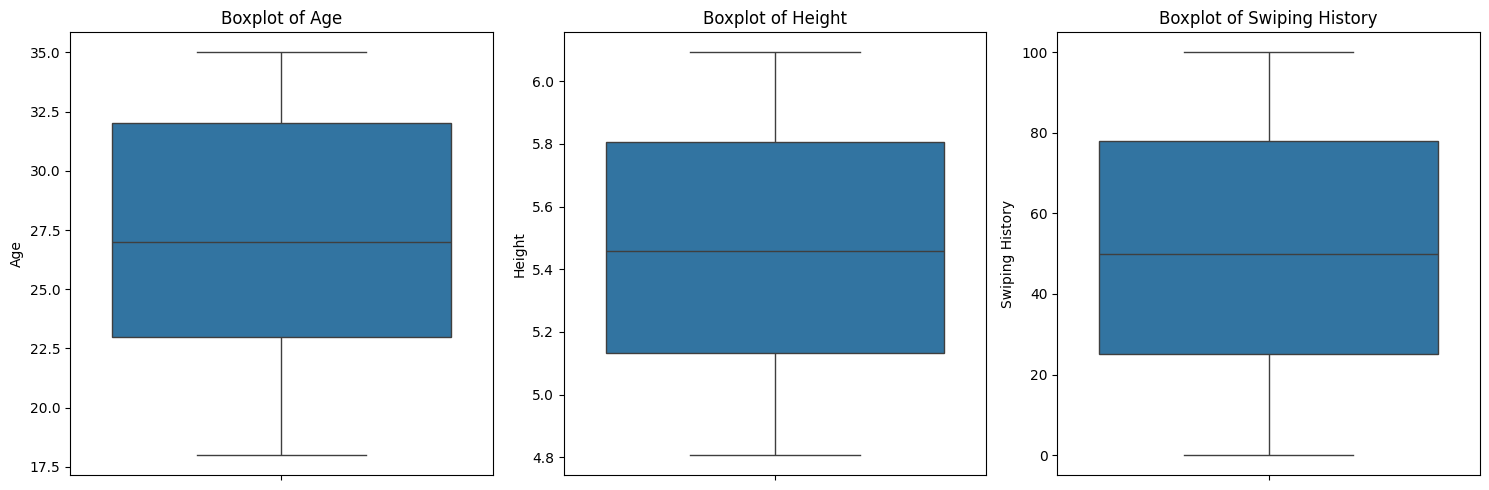

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your previous code

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Height'])
plt.title('Boxplot of Height')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Swiping History'])
plt.title('Boxplot of Swiping History')

plt.tight_layout()
plt.show()

The data looks cleaned as it is sourced from Kaggle cleaned data, so let just started the processing part

## Analysis goal
After analysing the data, we aimed to answers a few general question of comparing the expectation with the story told by the data. On the explore way, there might be some unexpected trend or facts that might draw some interesting conclusion!
- Young individuals (20s–30s) are the most frequent users of dating apps.
- Men are more likely to use dating apps frequently compared to women.
- Higher education levels might indicate less frequent usage due to busier schedules.
- Users with children are less likely to use the app frequently.



### Users' personal data with usages frequency

In [6]:
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


Let's group the features as basic background and app-related stats.

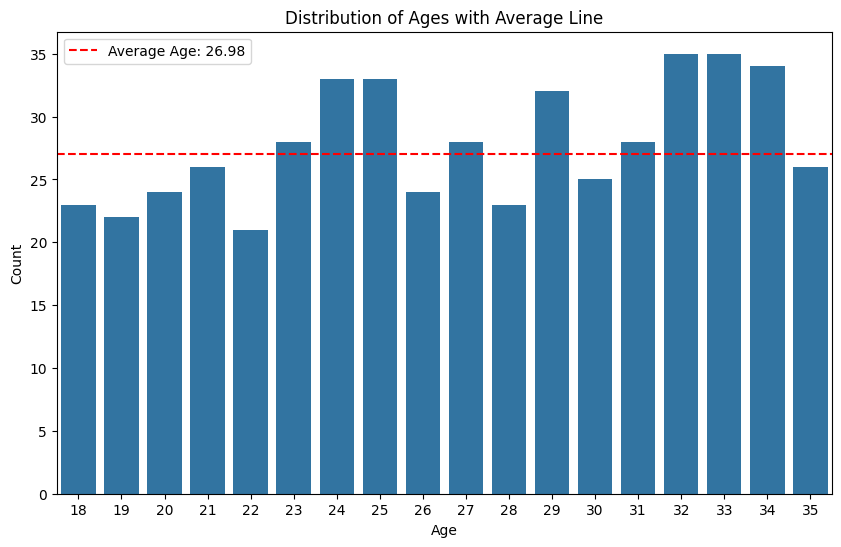

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average age
average_age = df['Age'].mean()

# Sort the ages and count occurrences
age_counts = df['Age'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)

# Add a horizontal line for the average age
plt.axhline(y=average_age, color='r', linestyle='--', label=f'Average Age: {average_age:.2f}')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages with Average Line')
plt.legend()
plt.show()

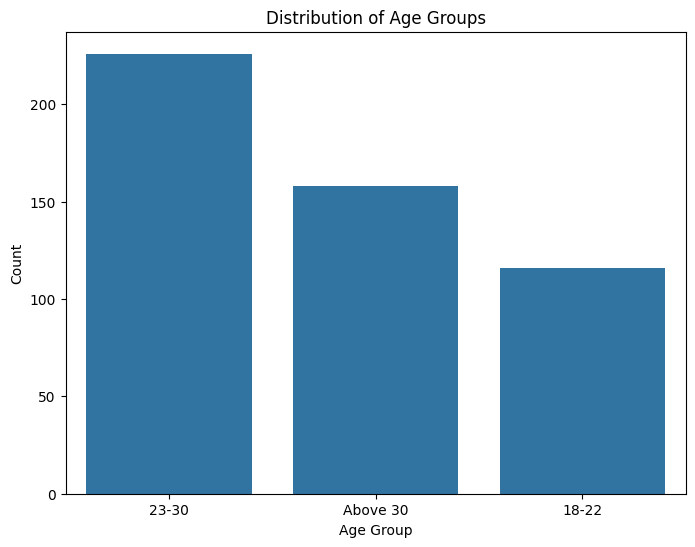

In [8]:
# Classify ages into groups
def classify_age(age):
    if 18 <= age <= 22:
        return '18-22'
    elif 23 <= age <= 30:
        return '23-30'
    elif age > 30:
        return 'Above 30'
    else:
        return 'Unknown' # Handle ages below 18 if needed

df['Age Group'] = df['Age'].apply(classify_age)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=df)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


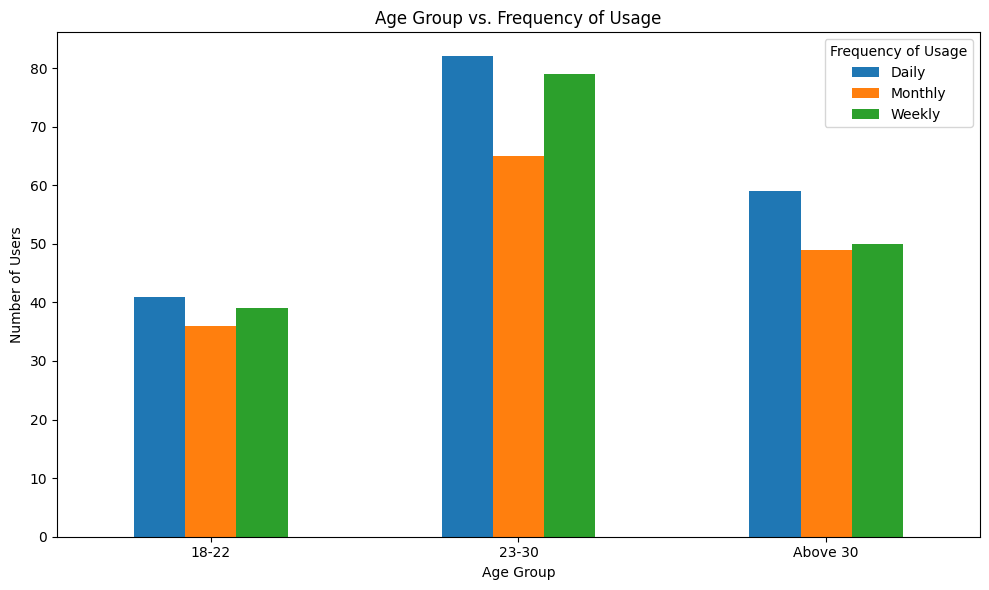

In [9]:

# Group by 'Age Group' and 'Frequency of Usage' and count occurrences
age_usage_counts = df.groupby(['Age Group', 'Frequency of Usage']).size().unstack(fill_value=0)

# Plotting the grouped data
age_usage_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group vs. Frequency of Usage')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Frequency of Usage')
plt.tight_layout()
plt.show()


The distribution might looks like people from 23-30 use the app more, but it is because of the uneven distribution since most people using the app is 23-30. We can see that in the 3 groups, most people uses it daily.

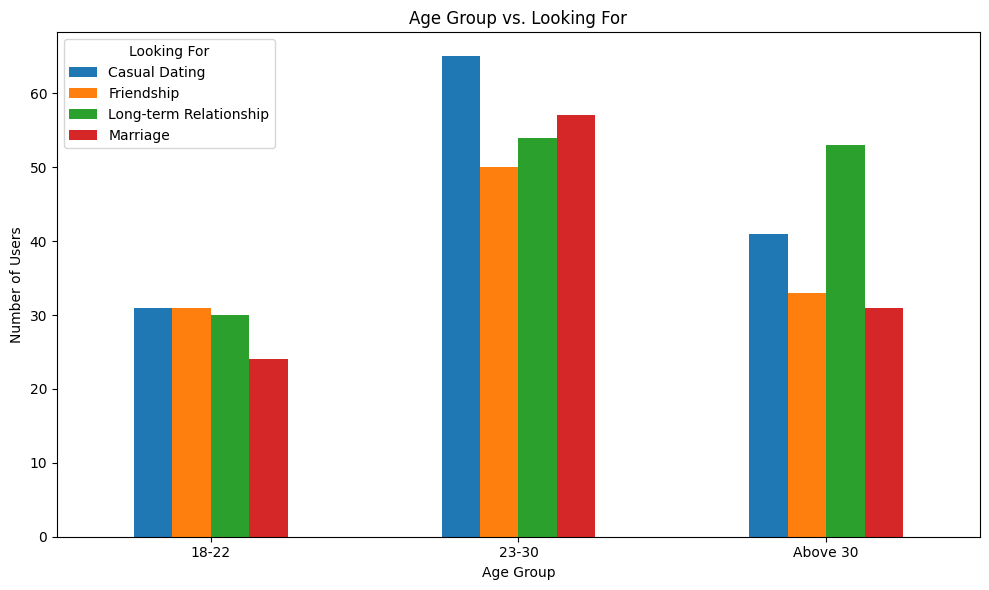

In [10]:
# Group by 'Age Group' and 'Looking For' and count occurrences
age_looking_for_counts = df.groupby(['Age Group', 'Looking For']).size().unstack(fill_value=0)

# Plotting the grouped data
age_looking_for_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group vs. Looking For')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Looking For')
plt.tight_layout()
plt.show()


The trend is quite obvious here. Young people only uses the app for simple entertaining, with all the stats the same, and they are too young to get married so its the least stats. The 2 other groups is also obvious, with 23-30 people wants to have a casual dating as they still got plenty of time and money to invest in love and marriage, and people who are older about above 30 majorly seeks for long-term relationships.

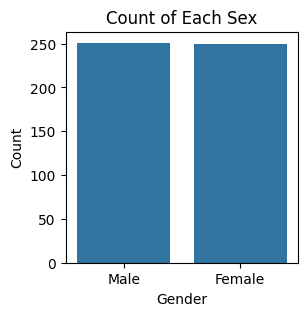

In [11]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Gender', data=df)
plt.title('Count of Each Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [12]:
gender_frequency_counts = df.groupby('Gender')['Frequency of Usage'].value_counts()
gender_frequency_counts

Gender  Frequency of Usage
Female  Daily                 87
        Weekly                85
        Monthly               77
Male    Daily                 95
        Weekly                83
        Monthly               73
Name: count, dtype: int64

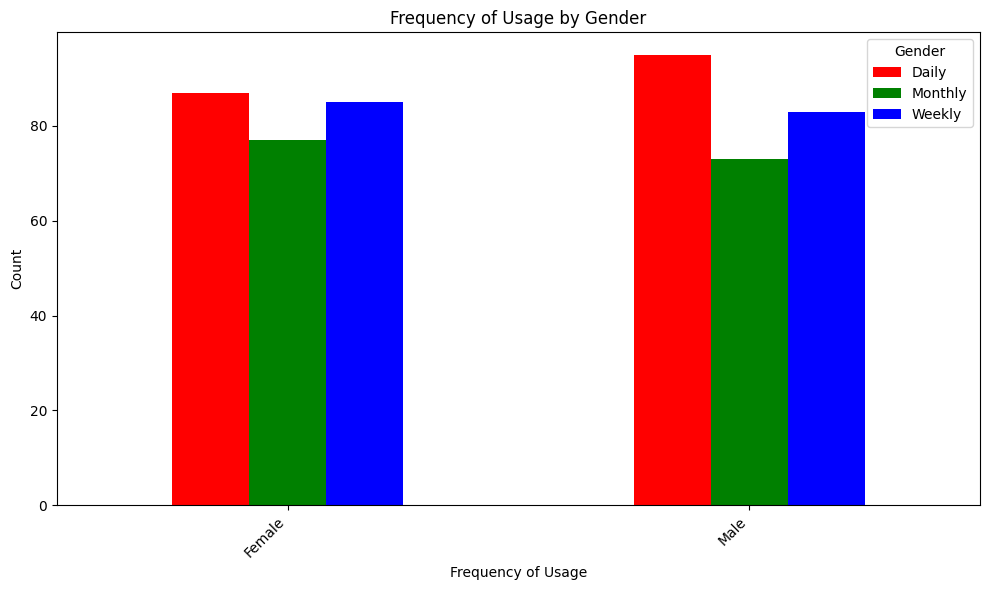

In [13]:
# Group by 'Gender' and count occurrences of each 'Frequency of Usage'
gender_frequency_counts = df.groupby('Gender')['Frequency of Usage'].value_counts().unstack(fill_value=0)

# Create the bar chart
gender_frequency_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'green', 'blue'])
plt.title('Frequency of Usage by Gender')
plt.xlabel('Frequency of Usage')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


- We can see that the distribution of data is quite similar to what we should expected from the data of a dating app usage. Most users are ranging from 20s to 30s, we can see that with the average of about 27, and people under 20s are clearly use less.
- Normally men are expected to use dating app more than women, as most app set the initiative part for the women, but the data shows that the numbers of the two gender are suprisingly equals. This might be because the dataset is sampled that way to avoid any bias, so we will take a look at the frequency of the two groups. We can see that the Male group indeed use more frequently, as most of them uses the app daily.

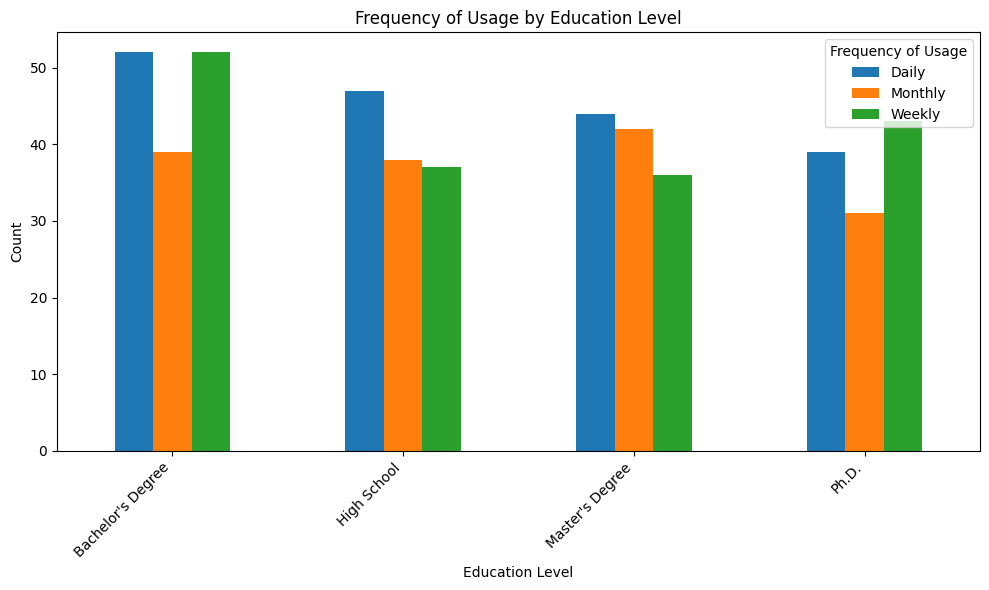

In [14]:

# Group by 'Education Level' and count occurrences of each 'Frequency of Usage'
education_frequency_counts = df.groupby('Education Level')['Frequency of Usage'].value_counts().unstack(fill_value=0)

# Create the bar chart
education_frequency_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Usage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Frequency of Usage')
plt.tight_layout()
plt.show()


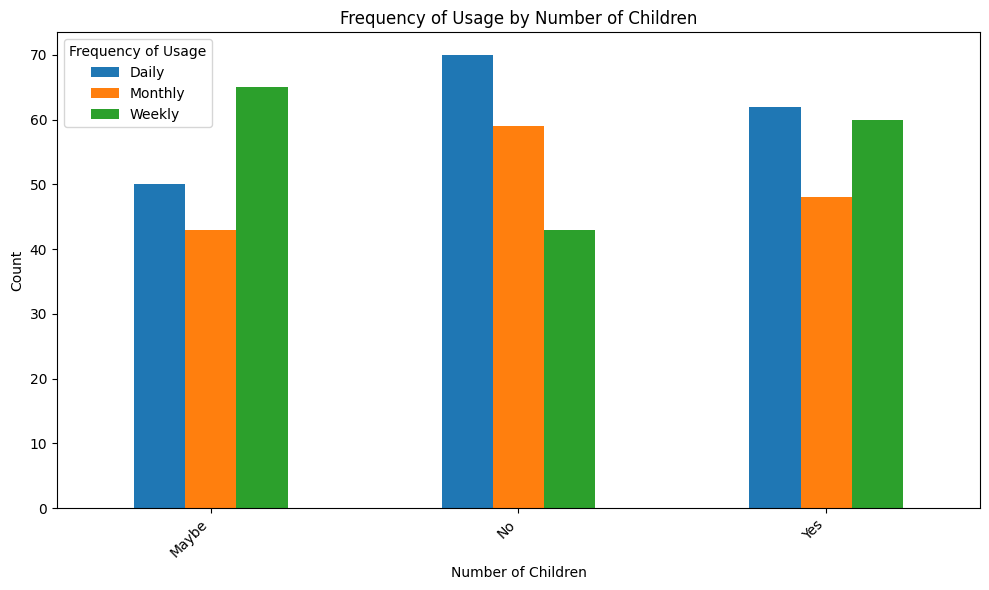

In [15]:
# Group by 'Children' and count occurrences of each 'Frequency of Usage'
children_frequency_counts = df.groupby('Children')['Frequency of Usage'].value_counts().unstack(fill_value=0)

# Create the bar chart
children_frequency_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Usage by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Frequency of Usage')
plt.tight_layout()
plt.show()


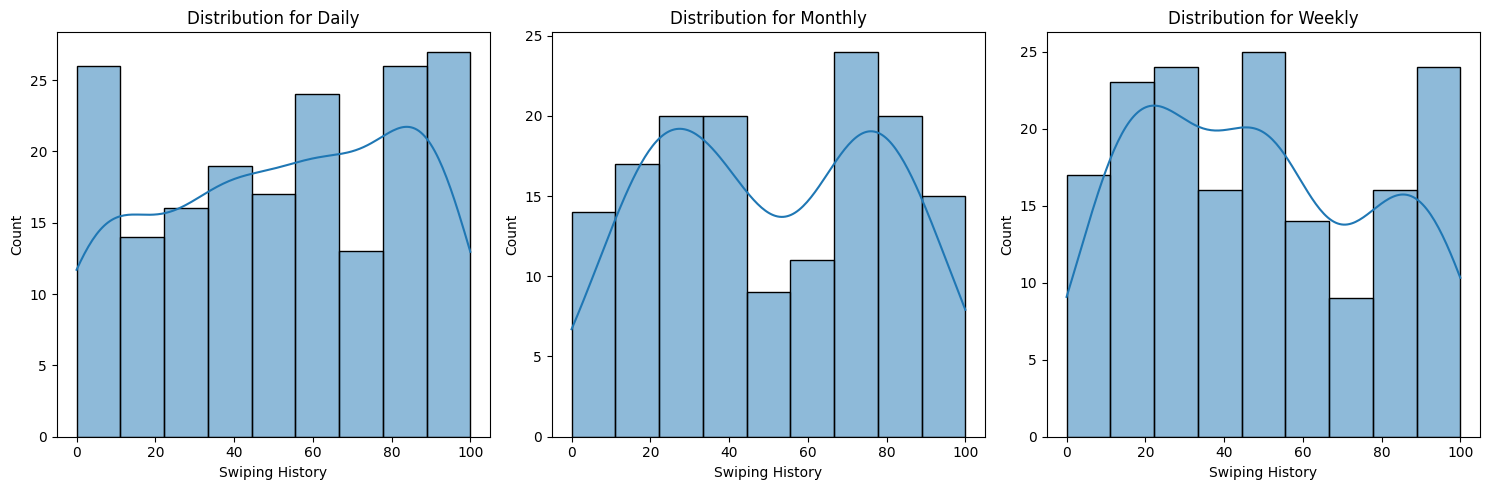

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Loop through each category and plot on the corresponding subplot
for i, (frequency, group) in enumerate(df.groupby('Frequency of Usage')):
    sns.histplot(group['Swiping History'], kde=True, ax=axes[i])  # Assign to specific subplot
    axes[i].set_title(f'Distribution for {frequency}')
    axes[i].set_xlabel('Swiping History')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

We can see the relationship between Frequency of Usage and the swiping count here. It is obvious that people who use the app daily would have the higher swiping count, and the opposite is true for people who only use the app Monthly. Weekly is like the blend of the two, with stats around the middle. We can see that people who use the app on a daily basis has the stats skewed to the right, which mean the more they use, the more they swipe. The correlation is not that strong, but it is somewhat correct.

### Users' Interests
Now let's take a look at their interest, to see if there are any particular trend

In [17]:
print(df['Interests'].head())
print(type(df['Interests'].iloc[0]))


0    ['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...
1                                ['Sports', 'Reading']
2                                           ['Sports']
3                                          ['Reading']
4    ['Sports', 'Hiking', 'Music', 'Movies', 'Readi...
Name: Interests, dtype: object
<class 'str'>


We can see that the Interest is stored as String, which will requires some preprocessing before we can extract the count of each features.

In [18]:
# Concatenate all strings from the 'Interests' column into a single string
interests_string = ' '.join(df['Interests'].astype(str))

In [19]:
import re

# Regular expression to match words (excluding colons and other characters)
pattern = r'\b\w+\b'  # Matches one or more word characters (\w) between word boundaries (\b)

# Find all matches in the string
matches = re.findall(pattern, interests_string)

# Create a new list to store the results
new_list = matches


In [20]:
from collections import Counter
import re
# Use Counter to count word occurrences
word_counts = Counter(new_list)

# Print the most common words
print(word_counts.most_common(10)) # Prints the top 10 most frequent words


[('Travel', 315), ('Music', 293), ('Sports', 292), ('Cooking', 291), ('Reading', 289), ('Hiking', 286), ('Movies', 279)]


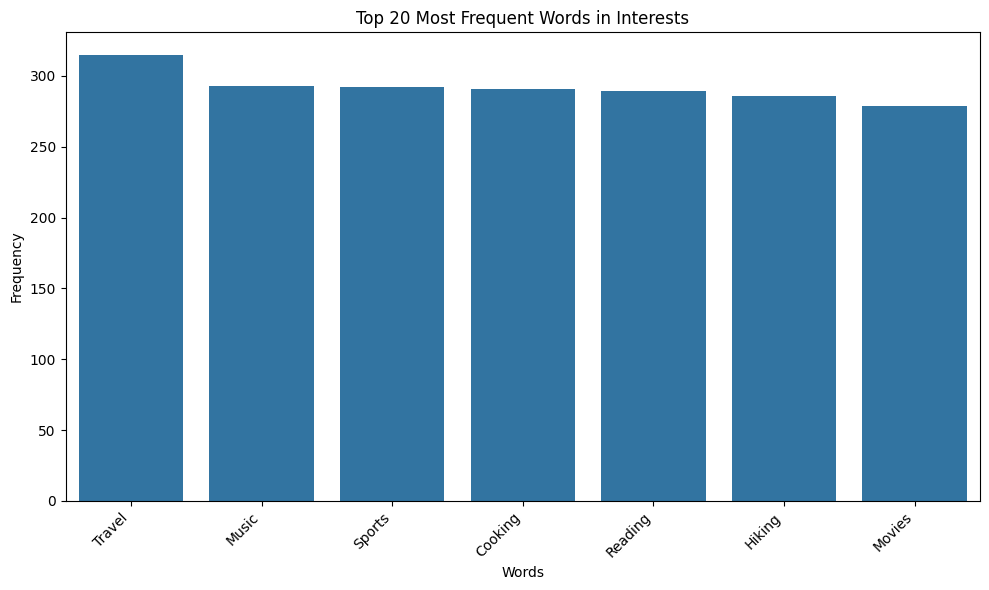

In [21]:
plt.figure(figsize=(10, 6))
word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words in Interests')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


The interests look equally distributed, without any skewed interest or anything amongst the users

In [22]:
# Assuming df is already loaded as in your previous code
def extract_interests(interests_str):
    if isinstance(interests_str, str):  # Check if interests_str is a string
        pattern = r'\b\w+\b'
        matches = re.findall(pattern, interests_str)
        return matches
    else:
        return []  # Return an empty list if it's not a string

# Apply the function to the 'Interests' column
df['Extracted Interests'] = df['Interests'].apply(extract_interests)
print(df[['Interests', 'Extracted Interests']].head())


                                           Interests  \
0  ['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...   
1                              ['Sports', 'Reading']   
2                                         ['Sports']   
3                                        ['Reading']   
4  ['Sports', 'Hiking', 'Music', 'Movies', 'Readi...   

                                 Extracted Interests  
0  [Sports, Cooking, Hiking, Music, Movies, Readi...  
1                                  [Sports, Reading]  
2                                           [Sports]  
3                                          [Reading]  
4           [Sports, Hiking, Music, Movies, Reading]  


In [23]:
df['Interest_Num'] = df['Extracted Interests'].str.len()

In [24]:
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage,Age Group,Extracted Interests,Interest_Num
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly,23-30,"[Sports, Cooking, Hiking, Music, Movies, Readi...",7
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly,23-30,"[Sports, Reading]",2
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily,23-30,[Sports],1
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily,23-30,[Reading],1
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly,Above 30,"[Sports, Hiking, Music, Movies, Reading]",5


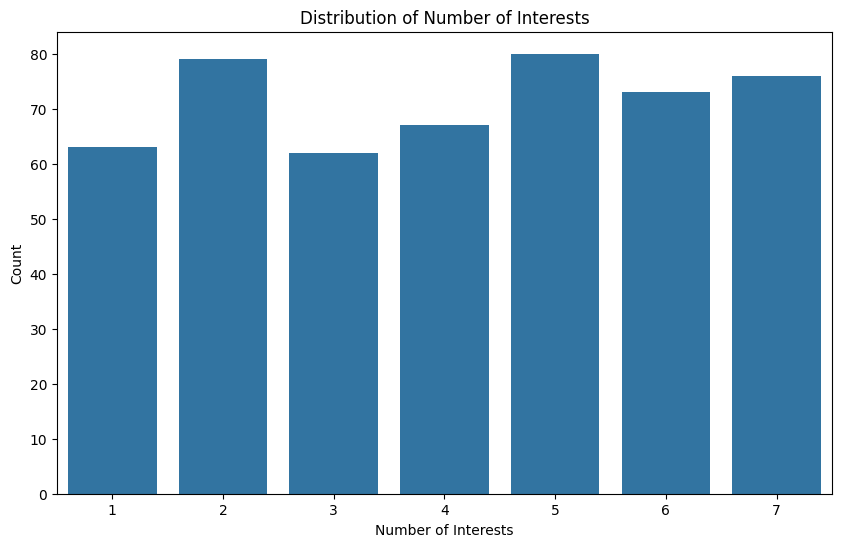

In [25]:
# Count the occurrences of each value in 'Interest_Num'
interest_num_counts = df['Interest_Num'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=interest_num_counts.index, y=interest_num_counts.values)
plt.xlabel('Number of Interests')
plt.ylabel('Count')
plt.title('Distribution of Number of Interests')
plt.show()


We can see that people either have over 5 interest or only put 2 on their bio. People with more unusual numbers like only 1 or 3-4 interest is slightly lower than that. It can be that most people found 2 is adequate, while the others wanted as much as possible, maybe it makes the profiles look more versatile.

In [26]:
outdoor_hobbies = {"Travel", "Sports", "Hiking"}
indoor_hobbies = {"Music", "Cooking", "Reading", "Movies"}

# Function to categorize hobbies
def categorize_hobby(hobby):
    if hobby in outdoor_hobbies:
        return "Outdoor"
    elif hobby in indoor_hobbies:
        return "Indoor"
    else:
        return "Unknown"  # If hobby doesn't fit either category

In [27]:
# Loop through each row and categorize interests
categorized_interests = []
for index, row in df.iterrows():
    interests = row['Extracted Interests']
    categorized_row_interests = []
    for interest in interests:
      categorized_row_interests.append(categorize_hobby(interest))
    categorized_interests.append(categorized_row_interests)

# Add the categorized interests as a new column to the DataFrame
df['Categorized Interests'] = categorized_interests

# Display the updated DataFrame (optional)
print(df[['Interests', 'Extracted Interests', 'Categorized Interests']].head())


                                           Interests  \
0  ['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...   
1                              ['Sports', 'Reading']   
2                                         ['Sports']   
3                                        ['Reading']   
4  ['Sports', 'Hiking', 'Music', 'Movies', 'Readi...   

                                 Extracted Interests  \
0  [Sports, Cooking, Hiking, Music, Movies, Readi...   
1                                  [Sports, Reading]   
2                                           [Sports]   
3                                          [Reading]   
4           [Sports, Hiking, Music, Movies, Reading]   

                               Categorized Interests  
0  [Outdoor, Indoor, Outdoor, Indoor, Indoor, Ind...  
1                                  [Outdoor, Indoor]  
2                                          [Outdoor]  
3                                           [Indoor]  
4         [Outdoor, Outdoor, Indoor, Indoor, Indoor

In [28]:
# Initialize new columns for outdoor and indoor interest counts
df['Outdoor_Interests'] = 0
df['Indoor_Interests'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    outdoor_count = 0
    indoor_count = 0

    # Access the 'Categorized Interests' list for the current row
    categorized_interests = row['Categorized Interests']

    # Count outdoor and indoor interests in the list
    for interest in categorized_interests:
        if interest == "Outdoor":
            outdoor_count += 1
        elif interest == "Indoor":
            indoor_count += 1

    # Update the new columns with the counts
    df.loc[index, 'Outdoor_Interests'] = outdoor_count
    df.loc[index, 'Indoor_Interests'] = indoor_count


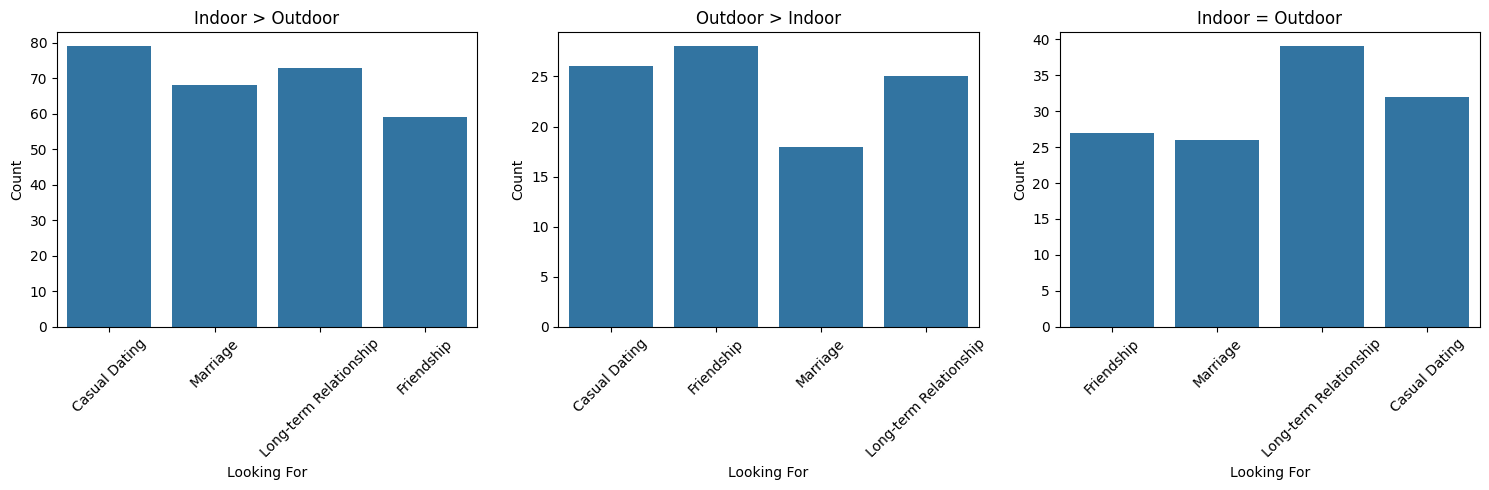

In [29]:
# Create three dataframes based on the comparison of indoor and outdoor interest counts
df_indoor_gt_outdoor = df[df['Indoor_Interests'] > df['Outdoor_Interests']]
df_outdoor_gt_indoor = df[df['Outdoor_Interests'] > df['Indoor_Interests']]
df_indoor_eq_outdoor = df[df['Indoor_Interests'] == df['Outdoor_Interests']]

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust size accordingly

# Function to plot the 'Looking For' distribution on each subplot
def plot_looking_for(ax, df, title):
    sns.countplot(x='Looking For', data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Looking For')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Plot each dataframe into its respective subplot
plot_looking_for(axes[0], df_indoor_gt_outdoor, 'Indoor > Outdoor')
plot_looking_for(axes[1], df_outdoor_gt_indoor, 'Outdoor > Indoor')
plot_looking_for(axes[2], df_indoor_eq_outdoor, 'Indoor = Outdoor')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Simply looking at the vertical axis we can see that most people has more Indoor hobbies or equal to outdoor. The trend we found is quite interesting.
- For people who enjoy indoor activities more, we can see that they are most likely to be the majority of people with nothing too special. They tend to find casual dating and long-term relationships.
- People who mostly enjoy their day outside, doing thrilling and energetic stuff, are more likely to find friends, perhaps so that they can enjoy their hobbies more.
- People with the same amount of hobbies has a very high chance of finding a long-term relationships, maybe because they have a consistent and balanced personality, so they prefer their relationships to be the same.

### Others interesting findings
Let's start by looking at the numerical stats to see if we can find any interesting correlations.

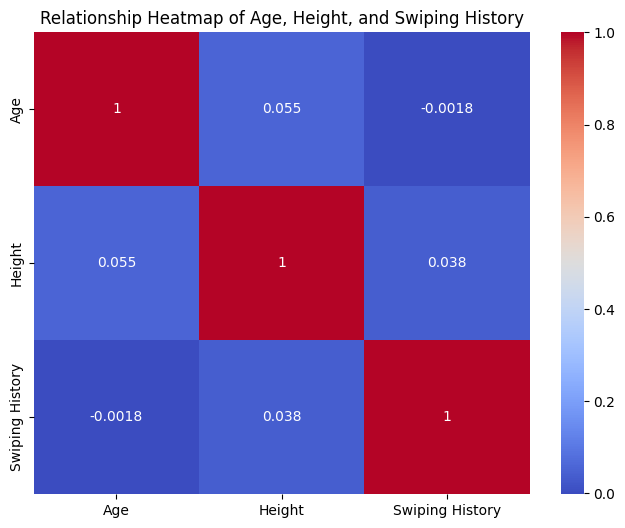

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Height', 'Swiping History']].corr(), annot=True, cmap='coolwarm')
plt.title('Relationship Heatmap of Age, Height, and Swiping History')
plt.show()

There's no significant correlations amongst the stats here, as expected.

We can started to see some trends amongst the user. Now let's group them on the most impactful stats like children, education and gender.

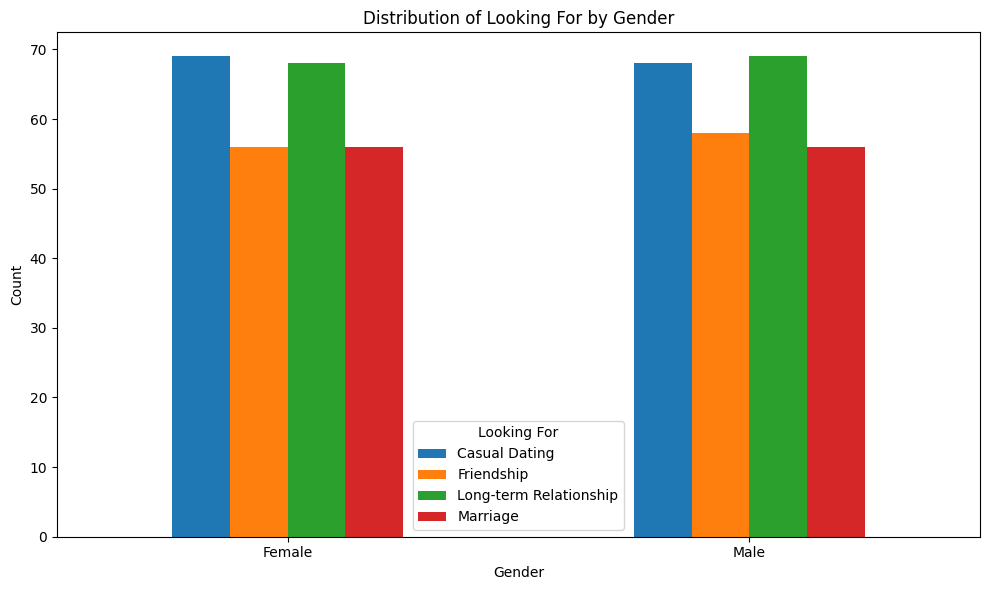

In [31]:
# prompt: Group Gender with Looking for and plot

# Group by 'Gender' and 'Looking For' and count occurrences
gender_lookingfor_counts = df.groupby(['Gender', 'Looking For']).size().unstack(fill_value=0)

# Create the plot
gender_lookingfor_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Looking For by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Looking For')
plt.tight_layout()
plt.show()


In [32]:
looking_for_counts = df['Looking For'].value_counts()
looking_for_counts

,count
Looking For,
Casual Dating,137
Long-term Relationship,137
Friendship,114
Marriage,112


The count of looking for is pretty evenly distributed. Marriage is hard and friendship is easy to find so its less, quite obvious

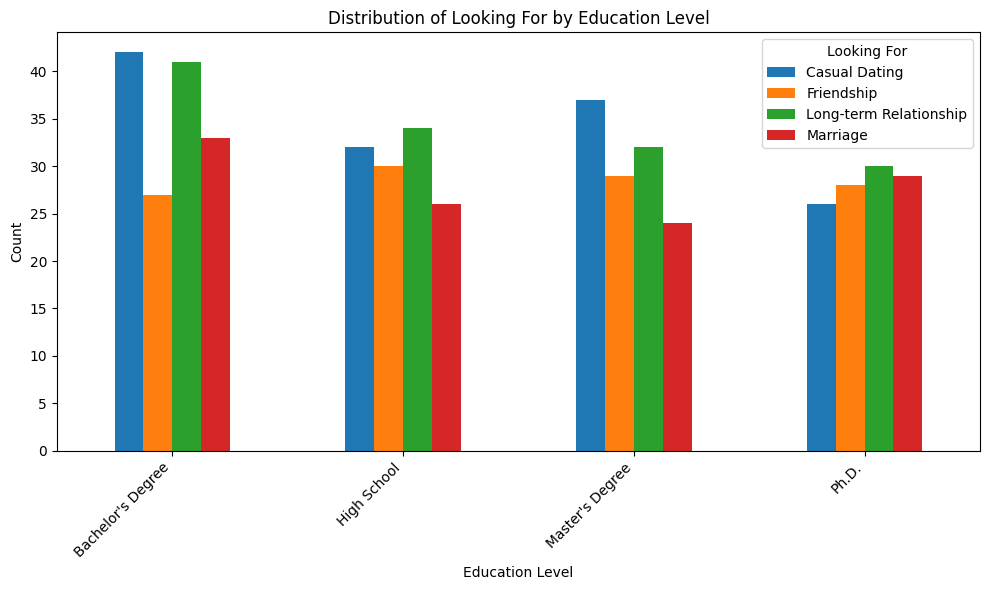

In [33]:
# prompt: Group Education Level with Looking for and plot

# Group data by 'Education Level' and 'Looking For' and count occurrences
education_looking_for_counts = df.groupby(['Education Level', 'Looking For']).size().unstack(fill_value=0)

# Create the plot
education_looking_for_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Looking For by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Looking For')
plt.tight_layout()
plt.show()


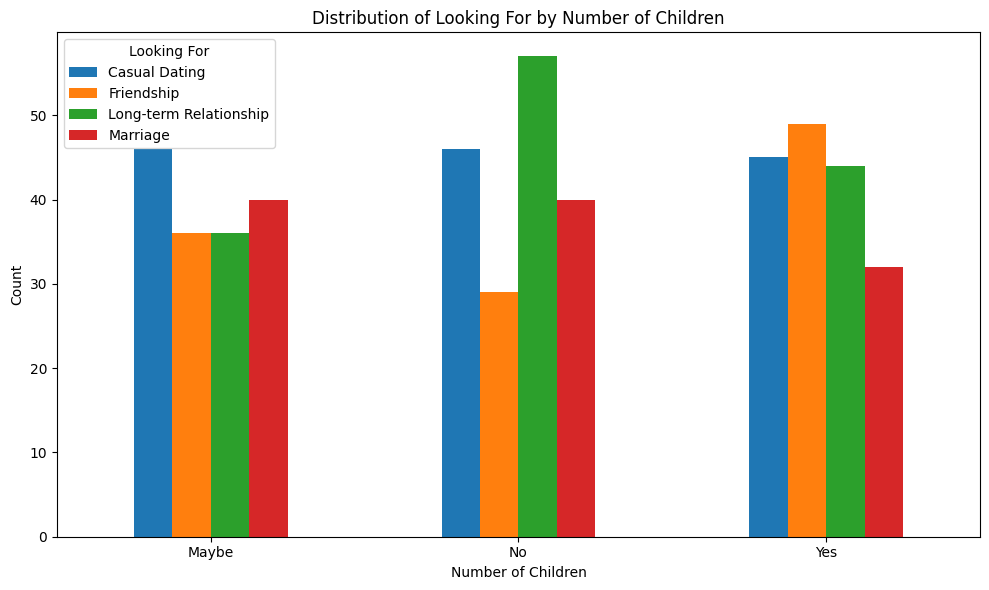

In [34]:
# Group data by 'Children' and 'Looking For' and count occurrences
children_looking_for_counts = df.groupby(['Children', 'Looking For']).size().unstack(fill_value=0)

# Create the plot
children_looking_for_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Looking For by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Looking For')
plt.tight_layout()
plt.show()


We can clearly see that people with no children and people with less education degree tends to use the app more as expected, as they are less busy and have more needs to find a relationships than others.

## Conclusion


In conclusion, we can see that most people using the dating app have their behaviors as expected as their personal details.
- Most users recorded are from the 23-30 age group, and the uses' frequency and swiping count are quite correlated together. The frequently used, the more swiped.
- Then we can see young people from 23-30 are more willing to invest into love with casual dating and marriage, while older people seeks for long-term relationships.
- We can tell from their personal interests that, people who enjoy outdoor activities more tends to only find Friendships so they can have more friends enjoying their hobbies together.
- People's educational background and children also affects alot, as the higher they study, the less they have time to use the app so the frequency of usage is lower as expected.

# Machine Learning Approach
Let's explore the dataset on a more Machine-Learning-orientated approach. From the general exploration, we can see that the interesting facts all come from the usage frequency and what people were looking for. So let's establish those two as the variable of prediction here.

Let's first try to predict the frequency using the stats we analyzed, which are gender, educational level and number of children.

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Frequency_Label'] = label_encoder.fit_transform(df['Frequency of Usage'])  # Convert to numerical labels
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage,Age Group,Extracted Interests,Interest_Num,Categorized Interests,Outdoor_Interests,Indoor_Interests,Frequency_Label
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly,23-30,"[Sports, Cooking, Hiking, Music, Movies, Readi...",7,"[Outdoor, Indoor, Outdoor, Indoor, Indoor, Ind...",3,4,2
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly,23-30,"[Sports, Reading]",2,"[Outdoor, Indoor]",1,1,1
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily,23-30,[Sports],1,[Outdoor],1,0,0
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily,23-30,[Reading],1,[Indoor],0,1,0
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly,Above 30,"[Sports, Hiking, Music, Movies, Reading]",5,"[Outdoor, Outdoor, Indoor, Indoor, Indoor]",2,3,1


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Select relevant features
features = ['Gender', 'Education Level', 'Children']
df_encoded = pd.get_dummies(df[features])  # Convert categorical data into numerical
X = df_encoded
y = df['Frequency_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))


KNN Accuracy: 0.45


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a few new records (replace with your actual data generation)
new_data = {
    'Gender': ['Female', 'Female', 'Male'],
    'Education Level': ['PhD', 'Bachelor', 'Master'],
    'Children': ['Yes', 'No', 'No']
}
new_df = pd.DataFrame(new_data)

# Preprocess the new data in the same way as the training data
new_df_encoded = pd.get_dummies(new_df)

# Ensure consistency in column order between new data and training data
missing_cols = set(X.columns) - set(new_df_encoded.columns)
for c in missing_cols:
  new_df_encoded[c] = 0
new_df_encoded = new_df_encoded[X.columns]

# Standardize the new data
new_df_scaled = scaler.transform(new_df_encoded)

# Predict using the trained KNN model
new_predictions = knn.predict(new_df_scaled)

# Decode the numerical labels back to original frequency labels
new_frequency_predictions = label_encoder.inverse_transform(new_predictions)

# Print the predictions
print("New Data Predictions:")
for i in range(len(new_data['Gender'])):
    print(f"Record {i+1}: Gender={new_data['Gender'][i]}, Education={new_data['Education Level'][i]}, Children={new_data['Children'][i]}, Predicted Frequency={new_frequency_predictions[i]}")


New Data Predictions:
Record 1: Gender=Female, Education=PhD, Children=Yes, Predicted Frequency=Weekly
Record 2: Gender=Female, Education=Bachelor, Children=No, Predicted Frequency=Daily
Record 3: Gender=Male, Education=Master, Children=No, Predicted Frequency=Daily


We can see that the model prediction is pretty reasonable, though the accuracy is only 0.45. As the correlations between the variables in this case is not very strong, the predictions still have high variance that make the cases more practical.

In [41]:
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage,Age Group,Extracted Interests,Interest_Num,Categorized Interests,Outdoor_Interests,Indoor_Interests,Frequency_Label
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly,23-30,"[Sports, Cooking, Hiking, Music, Movies, Readi...",7,"[Outdoor, Indoor, Outdoor, Indoor, Indoor, Ind...",3,4,2
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly,23-30,"[Sports, Reading]",2,"[Outdoor, Indoor]",1,1,1
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily,23-30,[Sports],1,[Outdoor],1,0,0
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily,23-30,[Reading],1,[Indoor],0,1,0
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly,Above 30,"[Sports, Hiking, Music, Movies, Reading]",5,"[Outdoor, Outdoor, Indoor, Indoor, Indoor]",2,3,1


Now let's try working with the 'Looking For' variable. From the simplicity of the dataset, complex models won't perform well, thus I will be grouping the categories into 2 only: Casual Dating or Friendship, and Long-term Relationships and Marriage. Then I will use Logistic regressions to predict the preference of that person.

In [42]:
# Create a new column 'Relationship_Type' based on 'Looking For' values
def categorize_relationship(looking_for):
    if looking_for in ['Casual Dating', 'Friendship']:
        return 'Casual Dating or Friendship'
    elif looking_for in ['Long-term Relationship', 'Marriage']:
        return 'Long-term Relationship or Marriage'
    else:
        return 'Other'  # Handle other values if needed

df['Relationship_Type'] = df['Looking For'].apply(categorize_relationship)


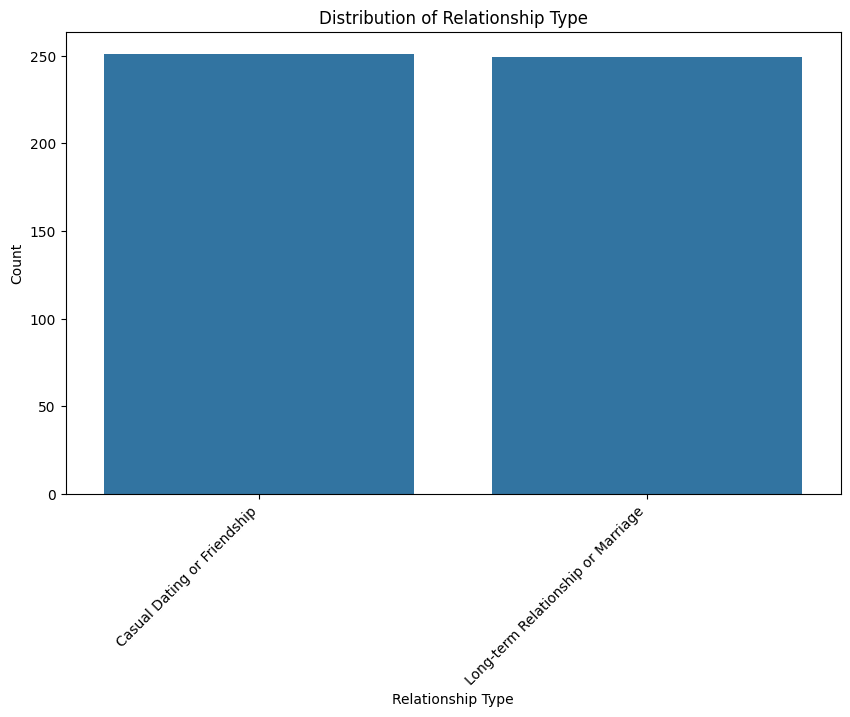

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Relationship_Type', data=df)
plt.title('Distribution of Relationship Type')
plt.xlabel('Relationship Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [57]:
from sklearn.linear_model import LogisticRegression

# Encode 'Age_group' and 'Relationship_Type'
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['Relationship_Type_Encoded'] = label_encoder.fit_transform(df['Relationship_Type'])

# Prepare features (X) and target (y)
X = df[['Age Group']]
y = df['Relationship_Type_Encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")


Accuracy of Logistic Regression: 0.53


As the relationships of the features are not very strong, the model perform poorly at only 53% which is only slightly better than guessing by random chance. It is may be due to the sample size being too small, without any help of large pre-trained model.